# Brain Tumor Detection Using Deep Learning

Importing the Necessary Libraries


In [8]:
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
import numpy as np
import tensorflow as tf
from tensorflow import keras

dataset download link: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

Unzip Dataset

In [9]:
# Unzip dataset
import zipfile
zip_ref = zipfile.ZipFile("brain_tumor.zip", 'r')
zip_ref.extractall()
zip_ref.close()

Assigning the training and testing data

In [10]:
train_dir = "/content/Training"
test_dir = "/content/Testing"

Data Augmentation

In [11]:
# Updated data augmentation with additional brightness range
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    # horizontal_flip=True,
    # brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(rescale=1./255)

Generators

In [12]:
# Load training and testing data
t_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,  # Smaller batch size for detailed learning
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


Visualization

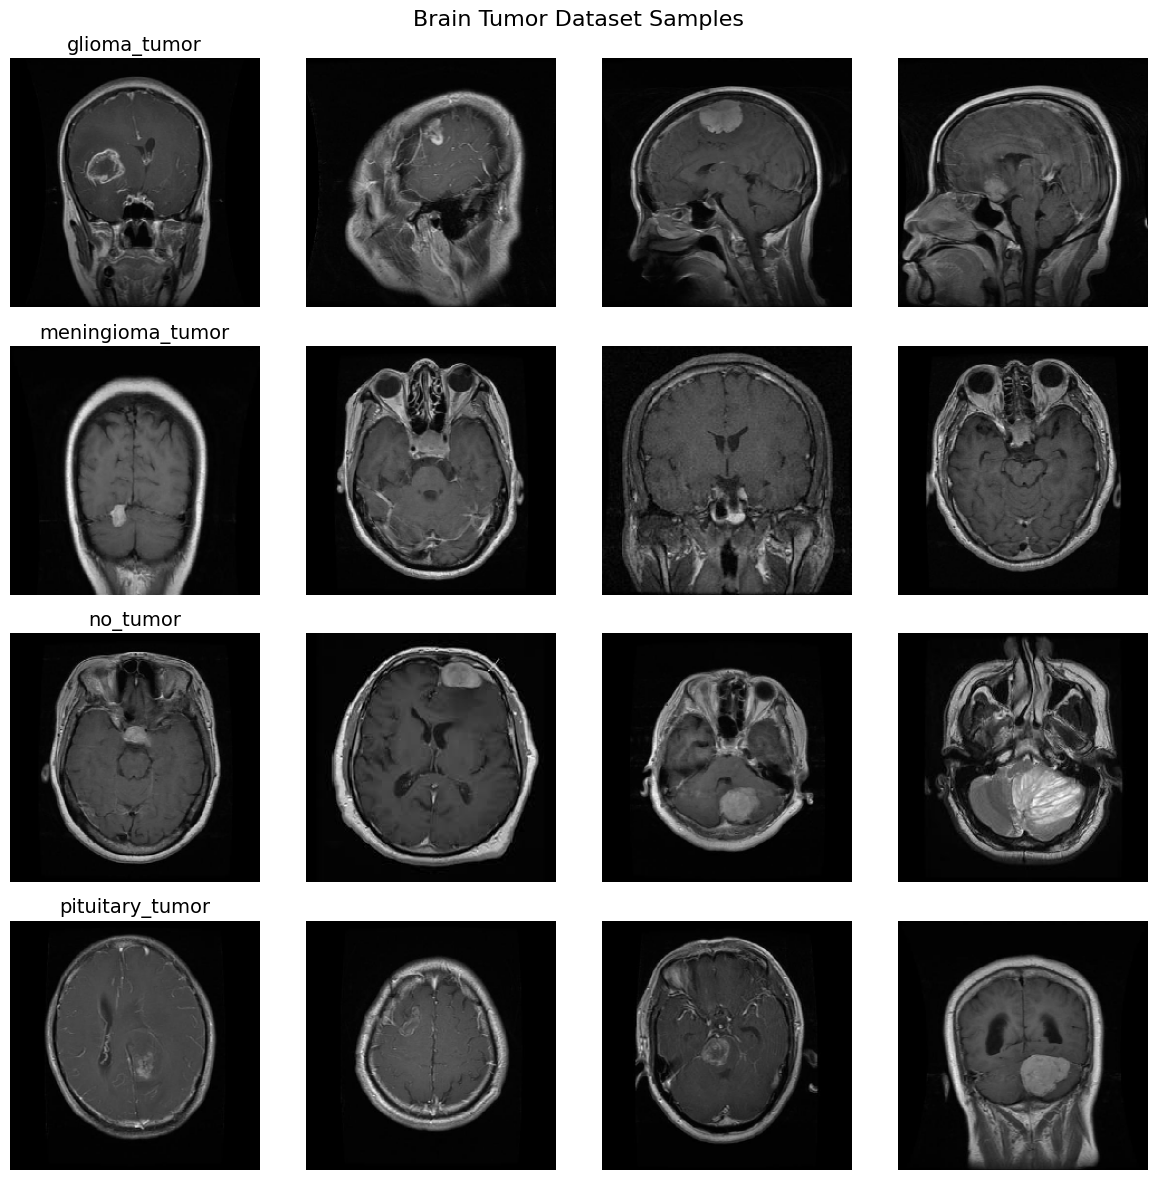

In [14]:
import matplotlib.pyplot as plt

# Plot sample images for each class
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Brain Tumor Dataset Samples', fontsize=16)

# Iterate over each class
for i, (class_name, images) in enumerate(t_generator.class_indices.items()):
    # Get four images from the current class
    # Use __next__() instead of next()
    images, labels = t_generator.__next__() # Changed line
    for j in range(4):
        # Show the image on the grid
        axes[i, j].imshow(images[j])
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(class_name, fontsize=14)

plt.tight_layout()
plt.show()

Calculate class weights

In [15]:
# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(t_generator.classes),
    y=t_generator.classes
)
class_weights = dict(enumerate(class_weights))

Building the Model

In [16]:
# Original model architecture as you provided
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  # Keeping the original dropout

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),


    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the Model

In [17]:
# Compile the model (same settings as your original code)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Fine Tuning

In [18]:
# Callbacks - keeping the original settings with patience adjusted slightly
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

Training the Model

In [20]:
# Train the model
history = model.fit(
    t_generator,
    epochs=50,
    validation_data=t_generator,
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 38s 134ms/step - accuracy: 0.4849 - loss: 4.6626 - val_accuracy: 0.1383 - val_loss: 6.9203 - learning_rate: 0.0010
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.4362 - loss: 1.2790 - val_accuracy: 0.1746 - val_loss: 7.2191 - learning_rate: 0.0010
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.4919 - loss: 1.1787 - val_accuracy: 0.3774 - val_loss: 5.3450 - learning_rate: 0.0010
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.5375 - loss: 1.0920 - val_accuracy: 0.5397 - val_loss: 1.1382 - learning_rate: 0.0010
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.5532 - loss: 1.1083 - val_accuracy: 0.6118 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.5650 - loss: 0.9875 - val_accuracy: 0.5652 - val_loss: 0.9972 - learning_rate: 0.0010
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.5555 - loss: 0.9

Model Evaluation

In [25]:

tloss, taccuracy = model.evaluate(t_generator)

180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9910 - loss: 0.0373


In [ ]:

print(f"Loss: {tloss}")
print(f" Accuracy: {taccuracy}")

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,437,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 29,484,494 (112.47 MB)

 Trainable params: 9,827,844 (37.49 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 19,655,690 (74.98 MB)

Performance Visualization

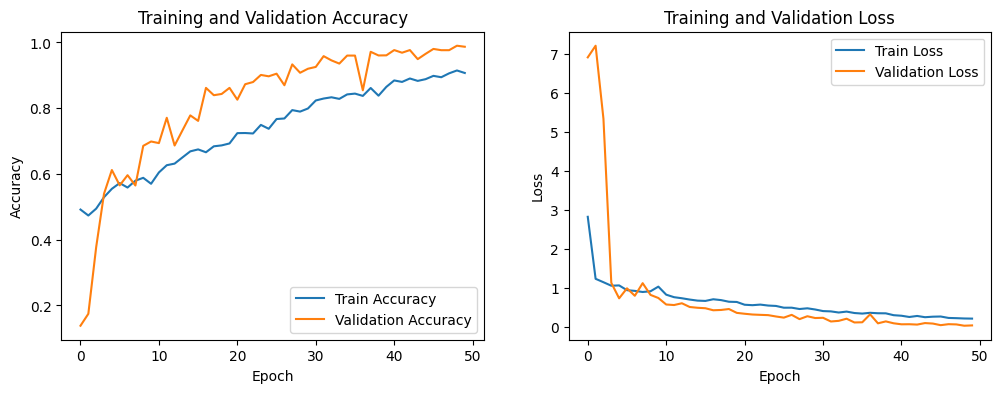

In [24]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()